***READ ME***

# CPI Nowcasting Project: README

## Introduction

This project aims to nowcast the Consumer Price Index (CPI) and its sub-categories for three consecutive months using machine learning techniques. CPI is an important economic indicator that measures the average change over time in the prices paid by consumers for a basket of goods and services. Nowcasting CPI is crucial for banks, businesses, and policymakers to make informed decisions regarding interest rates, fiscal policies, and investment strategies.

This Python notebook contains the steps taken to preprocess the data, explore the features, develop and optimize the machine learning models, and evaluate their performance on nowcasting the next CPI values.

## Project Overview

1. Data Preparation: The first step in the project is to gather and preprocess the data from various sources, such as historical CPI data, trade data, business confidence etc. Participants are encouraged to look for alternative data sources to improve their models.
2. Feature Engineering: In this step, we will explore the relationships between different features and the target variable (CPI). We will perform feature selection and transformation to create a feature set that is most relevant for our nowcasting task.
3. Model Development: We will experiment with different machine learning algorithms and neural network architectures to develop models that can accurately nowcast CPI values. We will also perform hyperparameter tuning and model optimization to improve the performance of our models.
4. Model Evaluation: We will evaluate the performance of our models using cross-validation and various evaluation metrics, such as Root Mean Squared Error (RMSE) which is strictly required for the project but also used R-squared (R²) score. We will select the best-performing model to nowcast CPI values for the given period.
5. Nowcasting: Finally, using the best-performing model, we will nowcast the next CPI value as well as CPI sub-categories for three consecutive months.

## Goals

The main goal of this project is to develop a robust and accurate machine learning model for nowcasting the CPI and its sub-categories. The success of the project will be measured by the performance of the final model on predicting the next three months of CPI values.

We hope that this Python notebook will provide a clear understanding of the steps taken to achieve this goal and inspire others to explore the potential of machine learning and data science in the field of economics.

## Setup and File Structure

All the files for this project are hosted on GitHub: https://github.com/mygitAN/CPI-NowCasting

1. Open the project in Google Colab, links are provided on the notebook. This will make things easy. You can clone the repository to your local machine if thats what you prefer.
2. Make sure you have all the required dependencies installed. For Google Colab, you don't need to worry about this step, as most of the dependencies are pre-installed.
3. Run the code in the provided order, starting from the data preparation step.

## Environment

This project is developed and tested in Google Colab. It should also work on a local machine with similar specifications and the required dependencies installed.

For the environment, you can create a `requirements.txt` file with the following content:

## Runtime

This notebook runs for 7 minutes.



In [273]:
import time

start_time = time.time()

In [274]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [275]:
#mount google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [276]:
import pandas as pd

# Read Retail trade sales from 2002.csv into a Pandas DataFrame
retail_sales_df = pd.read_csv('https://raw.githubusercontent.com/mygitAN/CPI-NowCasting/main/Retail%20trade%20sales%20from%202002.csv',sep=';')  #https://www.statssa.gov.za/?page_id=1847

# Read Prime_Lending_Rate.csv into a Pandas DataFrame
prime_lending_rate_df = pd.read_csv('https://raw.githubusercontent.com/mygitAN/CPI-NowCasting/main/Prime_Lending_Rate.csv',sep=';') #https://www.ber.ac.za/BER%20Documents/RMB/BER-Business-Confidence-Index/?doctypeid=1050

# Read CPI_headline_index.csv into a Pandas DataFrame
cpi = pd.read_csv('https://raw.githubusercontent.com/mygitAN/CPI-NowCasting/main/CPI_headline_index.csv',sep='\t')

# Read BER_Consumer Confidence Index.csv into a Pandas DataFrame
consumer_confidence_df = pd.read_csv('https://raw.githubusercontent.com/mygitAN/CPI-NowCasting/main/BER_Consumer%20Confidence%20Index.csv',sep=';')


In [277]:
# ABSA PMI Data
ABSA_pmi = pd.read_csv('https://raw.githubusercontent.com/mygitAN/CPI-NowCasting/main/ABSA%20PMI%20Data.csv',sep=',')

In [278]:
# Monthly Currency Data
Currency_data = pd.read_csv('https://raw.githubusercontent.com/mygitAN/CPI-NowCasting/main/MonthlyCurrencyDataFinal.csv',sep=',')


In [279]:
# Monthly Currency Data
NAAMSA_vehicle_Sales = pd.read_csv('https://raw.githubusercontent.com/mygitAN/CPI-NowCasting/main/NAAMSA%20Vehicles%20Sales%20Data.csv',sep=',')

In [280]:
# Monthly Currency Data
Subcategory_CPI_History = pd.read_csv('https://raw.githubusercontent.com/mygitAN/CPI-NowCasting/main/CPI_Historic_Values.csv',sep=',')

In [281]:
# Split the 'Date;CPI_headline' column into separate columns and rename them
cpi[['Date', 'CPI_headline']] = cpi['Date;CPI_headline'].str.split(';', expand=True)
cpi = cpi.drop(columns=['Date;CPI_headline'])
cpi = cpi[['Date', 'CPI_headline']]
cpi['CPI_headline'] = cpi['CPI_headline'].str.replace(',', '.').astype(float)

In [303]:
cpi

,Date,CPI_headline
0,2023/03/31,109.0
1,2023/02/28,107.9
2,2023/01/31,107.1
3,2022/12/31,107.2
4,2022/11/30,106.8
...,...,...
190,2007/05/31,45.4
191,2007/04/30,45.1
192,2007/03/31,44.6
193,2007/02/28,44.2


In [282]:
consumer_confidence_df

,Date,Consumer Confidence Index
0,1982/06/30,-2
1,1982/07/31,-4
2,1982/08/31,-4
3,1982/09/30,-4
4,1982/10/31,-8
...,...,...
485,2022/11/30,-8
486,2022/12/31,-8
487,2023/01/31,-23
488,2023/02/28,-23


In [283]:
retail_sales_df

,Date,General dealers,"food, beverages and tobacco","pharmaceutical and medical goods,cosmetics and toiletries","textiles,clothing,footwear and leather goods","household furniture,appliances and equipment","hardware,paint and glass",All other retailers
0,2005/01/31,10806,2336,1505,4019,2285,2322,4087
1,2005/02/28,10652,2347,1563,3613,2221,2549,4126
2,2005/03/31,11481,2570,1579,3876,2371,2444,4600
3,2005/04/30,10726,2525,1781,4849,2454,2618,4420
4,2005/05/31,10948,2365,1850,5066,2505,2844,4563
...,...,...,...,...,...,...,...,...
213,2022/10/31,45426,9765,8072,15738,4505,9456,9881
214,2022/11/30,54837,9328,7339,21060,6049,10180,10951
215,2022/12/31,62940,13354,8231,30226,6152,9251,12710
216,2023/01/31,44525,9233,7898,16780,4133,7989,11181


In [284]:
#merging data frames
merged_data = pd.merge(retail_sales_df, prime_lending_rate_df, on='Date')
#merged_data = pd.merge(merged_data, ABSA_pmi, on='Date')
#merged_data = pd.merge(merged_data, Currency_data, on='Date')
merged_data = pd.merge(merged_data, consumer_confidence_df, on='Date')
merged_data = pd.merge(merged_data, cpi, on='Date')


In [285]:
print(cpi.columns)

Index(['Date', 'CPI_headline'], dtype='object')


In [286]:
print(merged_data.columns)

Index(['Date', 'General dealers', 'food, beverages and tobacco',
       'pharmaceutical and medical goods,cosmetics and toiletries',
       'textiles,clothing,footwear and leather goods',
       'household furniture,appliances and equipment',
       'hardware,paint and glass', 'All other retailers', 'Interest rate',
       'Consumer Confidence Index', 'CPI_headline'],
      dtype='object')


In [287]:
#merged_data 
correlation_matrix = merged_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                                                    General dealers  \
General dealers                                            1.000000   
food, beverages and tobacco                                0.964089   
pharmaceutical and medical goods,cosmetics and ...         0.932684   
textiles,clothing,footwear and leather goods               0.897472   
household furniture,appliances and equipment               0.708467   
hardware,paint and glass                                   0.886297   
All other retailers                                        0.752939   
Interest rate                                             -0.528205   
Consumer Confidence Index                                 -0.580190   
CPI_headline                                               0.932400   

                                                    food, beverages and tobacco  \
General dealers                                                        0.964089   
food, beverages and tobacco                         

<ipython-input-287-709bdd7084a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


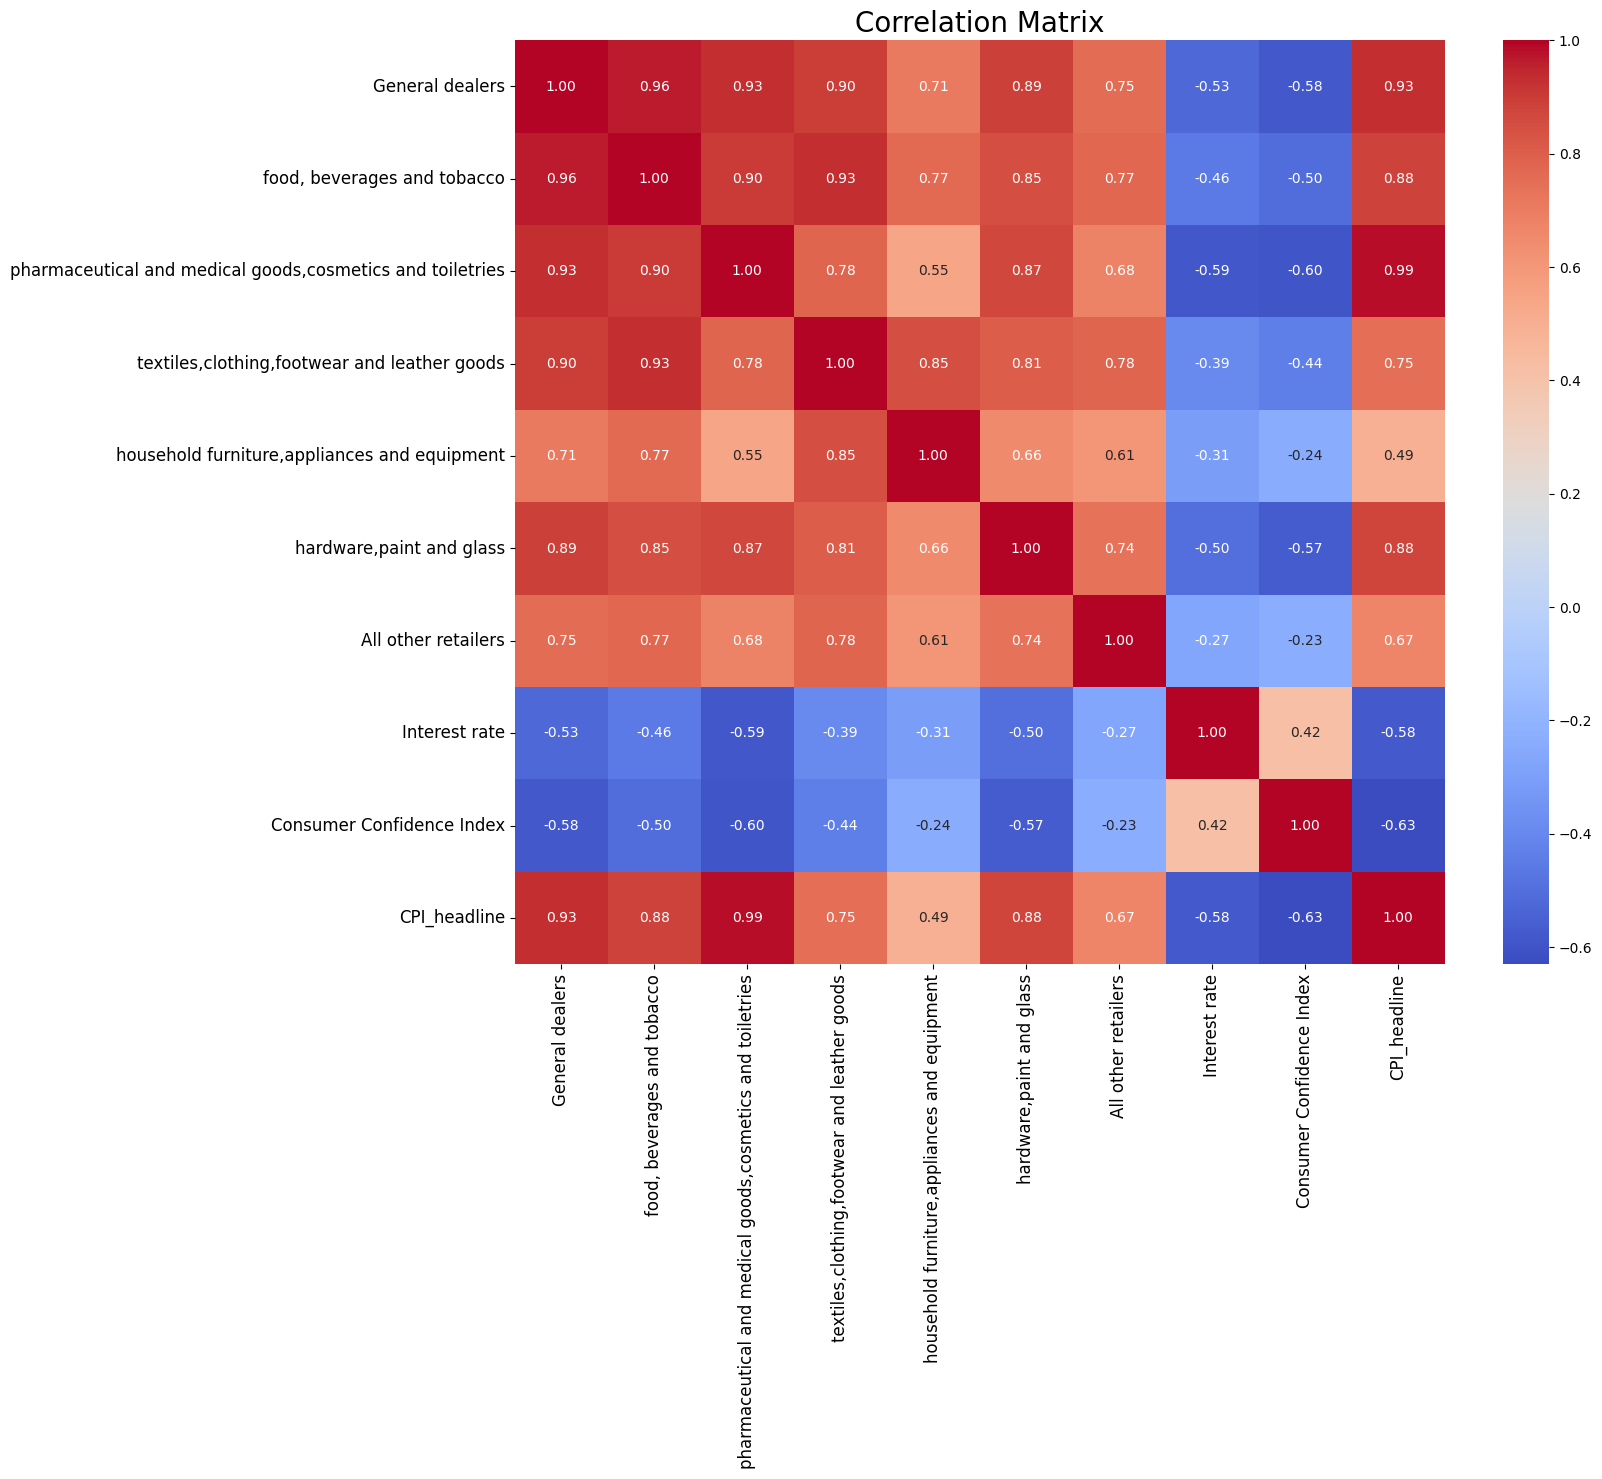

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(15, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Set up the title and labels
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.show()


Based on the correlation matrix, we identify the features that have the lowest correlation with the target variable (CPI_headline). Low correlation values indicate that these features might not be very helpful in predicting the target variable. Here's a list of features sorted by their absolute correlation with CPI_headline:

All other retailers (0.673869)
household furniture, appliances and equipment (0.490293)
Interest rate (-0.585674)

***We need to test the model with and without these features to see the really do not add value.***

In [289]:
# Handle missing values and preprocess the data as necessary
merged_data.fillna(merged_data.mean(), inplace=True)

# Convert date column to Unix timestamp
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['Date'] = merged_data['Date'].astype(int) / 10**9

<ipython-input-289-5106da216db3>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.fillna(merged_data.mean(), inplace=True)


In [290]:
merged_data

,Date,General dealers,"food, beverages and tobacco","pharmaceutical and medical goods,cosmetics and toiletries","textiles,clothing,footwear and leather goods","household furniture,appliances and equipment","hardware,paint and glass",All other retailers,Interest rate,Consumer Confidence Index,CPI_headline
0,1.170202e+09,13390,2840,1914,5045,3239,3529,5604,12.50,23,44.2
1,1.172621e+09,13581,2757,1924,4642,2930,3989,5695,12.50,23,44.2
2,1.175299e+09,15186,3151,2062,4996,3207,4202,6059,12.50,23,44.6
3,1.177891e+09,14842,3193,1937,5975,3181,3747,5663,12.50,21,45.1
4,1.180570e+09,15338,3107,2132,5979,3427,4227,6002,12.50,21,45.4
...,...,...,...,...,...,...,...,...,...,...,...
189,1.667174e+09,45426,9765,8072,15738,4505,9456,9881,9.75,-8,106.5
190,1.669766e+09,54837,9328,7339,21060,6049,10180,10951,10.50,-8,106.8
191,1.672445e+09,62940,13354,8231,30226,6152,9251,12710,10.50,-8,107.2
192,1.675123e+09,44525,9233,7898,16780,4133,7989,11181,10.75,-23,107.1


In [291]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split X and y
y = merged_data['CPI_headline']
X = merged_data.drop(['CPI_headline'], axis=1)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets with a 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [292]:
# Dropping the least correlated features
merged_data_reduced = merged_data.drop(['All other retailers', 'household furniture,appliances and equipment', 'Interest rate'], axis=1)

# Separate features (X) and target (y) variables
X_reduced = merged_data_reduced.drop(columns=['CPI_headline'])
y = merged_data['CPI_headline']

# Scale the numeric features
scaler = StandardScaler()
X_reduced = scaler.fit_transform(X_reduced)

# Split the dataset into training and testing sets with a 70/30 ratio
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=42)


In [293]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def build_and_compile_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def cross_validate_rmse(X, y, n_splits=8):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, val_idx in kfold.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        model = build_and_compile_model(X_train.shape[1])
        model.fit(X_train, y_train, epochs=600, batch_size=32, verbose=0)

        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Assuming X and X_reduced are your feature sets
rmse_full = cross_validate_rmse(X, y)
rmse_reduced = cross_validate_rmse(X_reduced, y)

print(f"RMSE with all features: {rmse_full:.4f}")
print(f"RMSE without least correlated features: {rmse_reduced:.4f}")


1/1 [==============================] - 0s 67ms/step
RMSE with all features: 2.1110
RMSE without least correlated features: 1.4654


***Below Grid Algorithm was used to find best parameters***

In [294]:
# #Grid Search for tunning
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# # Define the neural network model
# def create_model(optimizer='adam', neurons=64, activation='relu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
#     model.add(Dense(neurons // 2, activation=activation))
#     model.add(Dense(1, activation='linear'))
#     model.compile(loss='mean_squared_error', optimizer=optimizer)
#     return model

# # Create the KerasClassifier wrapper
# model = KerasClassifier(build_fn=create_model, verbose=0)

# # Define the parameter grid for the search
# param_grid = {
#     'optimizer': ['adam', 'rmsprop'],
#     'neurons': [32, 64, 128],
#     'activation': ['relu', 'tanh'],
#     'batch_size': [16, 32],
#     'epochs': [100]
# }

# # Create the GridSearchCV object
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# # Assuming X and y are your feature set and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# # Perform the grid search
# grid_result = grid.fit(X_train, y_train)

# # Print the best combination of parameters
# print(f"Best parameters: {grid_result.best_params_}")

# # Evaluate the best model on test data
# best_model = grid_result.best_estimator_
# y_pred = best_model.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print(f"RMSE on test data: {rmse:.4f}")


In [295]:
def build_and_compile_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
    return model

def cross_validate_rmse(X, y, n_splits=8):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []

    for train_idx, val_idx in kfold.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        model = build_and_compile_model(X_train.shape[1])
        model.fit(X_train, y_train, epochs=600, batch_size=16, verbose=0)

        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Assuming X and X_reduced are your feature sets
rmse_full = cross_validate_rmse(X, y)
rmse_reduced = cross_validate_rmse(X_reduced, y)

print(f"RMSE with all features: {rmse_full:.4f}")
print(f"RMSE without least correlated features: {rmse_reduced:.4f}")

1/1 [==============================] - 0s 82ms/step
RMSE with all features: 0.6462
RMSE without least correlated features: 0.4865


**From the above we can see those specific features no not add value to the model and as a result can be dropped**

In [296]:
#Train final model

from sklearn.metrics import r2_score

# Assuming X_reduced and y are your reduced feature set and target variable
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=42)


# Build and compile the model
model = build_and_compile_model(X_train_reduced.shape[1])

# Train the model
model.fit(X_train_reduced, y_train, epochs=1000, batch_size=32, verbose=2)

# Evaluate the model on test data
y_pred = model.predict(X_test_reduced)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE on test data: {rmse:.4f}")
print(f"R^2 score on test data: {r2:.4f}")


Epoch 1/1000
5/5 - 1s - loss: 5767.1470 - 706ms/epoch - 141ms/step
Epoch 2/1000
5/5 - 0s - loss: 5713.7373 - 12ms/epoch - 2ms/step
Epoch 3/1000
5/5 - 0s - loss: 5678.7295 - 13ms/epoch - 3ms/step
Epoch 4/1000
5/5 - 0s - loss: 5650.0073 - 12ms/epoch - 2ms/step
Epoch 5/1000
5/5 - 0s - loss: 5619.1255 - 12ms/epoch - 2ms/step
Epoch 6/1000
5/5 - 0s - loss: 5596.4194 - 13ms/epoch - 3ms/step
Epoch 7/1000
5/5 - 0s - loss: 5568.9282 - 12ms/epoch - 2ms/step
Epoch 8/1000
5/5 - 0s - loss: 5542.2056 - 13ms/epoch - 3ms/step
Epoch 9/1000
5/5 - 0s - loss: 5514.3115 - 14ms/epoch - 3ms/step
Epoch 10/1000
5/5 - 0s - loss: 5485.2871 - 12ms/epoch - 2ms/step
Epoch 11/1000
5/5 - 0s - loss: 5450.3110 - 12ms/epoch - 2ms/step
Epoch 12/1000
5/5 - 0s - loss: 5413.8413 - 13ms/epoch - 3ms/step
Epoch 13/1000
5/5 - 0s - loss: 5370.5190 - 13ms/epoch - 3ms/step
Epoch 14/1000
5/5 - 0s - loss: 5325.8936 - 14ms/epoch - 3ms/step
Epoch 15/1000
5/5 - 0s - loss: 5274.7578 - 13ms/epoch - 3ms/step
Epoch 16/1000
5/5 - 0s - loss: 

In [297]:
print(f"RMSE on test data: {rmse:.4f}")
print(f"R^2 score on test data: {r2:.4f}")

RMSE on test data: 0.6230
R^2 score on test data: 0.9985


***Architecture***

This neural network is a simple feedforward neural network or Multi-Layer Perceptron (MLP). It consists of an input layer, two hidden layers, and an output layer. The layers are as follows:

Input Layer:

The input layer takes the features from reduced dataset. The number of input features is defined by input_dim.
This layer doesn't perform any computation and serves as an entry point for the feature values.
Hidden Layer 1:

This is a fully connected Dense layer with 64 neurons and a hyperbolic tangent (tanh) activation function.
The layer is fully connected, meaning each neuron in this layer is connected to all neurons from the previous layer (input layer).
The tanh activation function is defined as f(x) = (e^(x) - e^(-x))/(e^(x) + e^(-x)), introducing non-linearity into the model, allowing it to learn more complex patterns in the data.
Hidden Layer 2:

This is another fully connected Dense layer with 32 neurons and a tanh activation function.
Similar to the previous hidden layer, each neuron in this layer is connected to all neurons from the previous layer (Hidden Layer 1).
The tanh activation function is used here as well, introducing non-linearity.
Output Layer:

This is the final fully connected Dense layer with a single neuron and a linear activation function.
The output layer neuron is connected to all neurons from the previous layer (Hidden Layer 2).
A linear activation function (f(x) = x) is used in this layer since you're solving a regression problem, and the goal is to predict a continuous target value. The linear activation function allows the model to output any real number.
The model is compiled with the following specifications:

Loss Function: Mean Squared Error (MSE) is used as the loss function. It measures the average squared difference between the predicted and true values, making it suitable for regression problems.
Optimizer: The RMSprop optimizer is used for training the model. It's an adaptive learning rate optimization algorithm that adapts the learning rate for each parameter during training.
This model is trained using 600 epochs and a batch size of 16. The RMSE is calculated for both the full feature set and the reduced feature set, and the model with the reduced feature set performs better.

In [298]:
def predict_cpi(model, date, general_dealers, food_beverages_tobacco,
                pharmaceutical_medical_goods_cosmetics_toiletries,
                textiles_clothing_footwear_leather_goods,
                hardware_paint_glass, consumer_confidence_index):
    
    input_data = pd.DataFrame({
        'Date': [date],
        'General dealers': [general_dealers],
        'food, beverages and tobacco': [food_beverages_tobacco],
        'pharmaceutical and medical goods,cosmetics and toiletries': [pharmaceutical_medical_goods_cosmetics_toiletries],
        'textiles,clothing,footwear and leather goods': [textiles_clothing_footwear_leather_goods],
        'hardware,paint and glass': [hardware_paint_glass],
        'Consumer Confidence Index': [consumer_confidence_index]
    })

    # Preprocess the input data as you did for your training data
    # For example, if you scaled the features, apply the same scaling here
    
    input_data_scaled = scaler.transform(input_data)  # Replace 'scaler' with the scaler you used during preprocessing

    # Use the model to predict the CPI
    prediction = model.predict(input_data_scaled)

    return prediction[0, 0]


In [299]:
import datetime

def date_to_unix_timestamp(date_str):
    date_obj = datetime.datetime.strptime(date_str, "%Y-%m-%d")
    timestamp = datetime.datetime.timestamp(date_obj)
    return timestamp


In [300]:
def predict_cpi(model, date, general_dealers, food_beverages_tobacco,
                pharmaceutical_medical_goods_cosmetics_toiletries,
                textiles_clothing_footwear_leather_goods,
                hardware_paint_glass, consumer_confidence_index):

    unix_timestamp = date_to_unix_timestamp(date)

    input_data = np.array([[unix_timestamp, general_dealers, food_beverages_tobacco,
                            pharmaceutical_medical_goods_cosmetics_toiletries,
                            textiles_clothing_footwear_leather_goods,
                            hardware_paint_glass,consumer_confidence_index]])

    prediction = model.predict(input_data)
    return prediction[0][0]


***Please note the retail sales data for March is not yet released. I have used the data as of february, when March and April data for nowcasting April CPI is available then we can use the latest data***

In [301]:
predicted_cpi = predict_cpi(model,
                            "2023-04-30", #Date
                            49095, #general_dealers
                            9215,  #food_beverages_tobacco
                            7196, #pharmaceutical_medical_goods_cosmetics_toiletries
                            15745, #textiles_clothing_footwear_leather_goods,
                            8149, #hardware_paint_glass
                            -23) #consumer_confidence_index

print("Predicted April CPI:", predicted_cpi)


1/1 [==============================] - 0s 20ms/step
Predicted April CPI: 108.53525


In [302]:
end_time = time.time()
duration = end_time - start_time

hours, rem = divmod(duration, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Notebook run time: {int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}")

Notebook run time: 00:06:55
